In [92]:
import pandas as pd
import json

# Load data from the first JSON file 'people_10.json'
with open('../data/people/people_10.json', 'r') as f:
    data1 = json.load(f)
df1 = pd.read_json(json.dumps(data1))

# Load data from the second JSON file 'people_20.json'
with open('../data/people/people_20.json', 'r') as f:
    data2 = json.load(f)
df2 = pd.read_json(json.dumps(data2))

# Load data from the second JSON file 'people_20.json'
with open('../data/people/people_30.json', 'r') as f:
    data3 = json.load(f)
df3 = pd.read_json(json.dumps(data3))

# Load data from the second JSON file 'people_20.json'
with open('../data/people/people_40.json', 'r') as f:
    data4 = json.load(f)
df4 = pd.read_json(json.dumps(data4))

# Load data from the second JSON file 'people_20.json'
with open('../data/people/people_50.json', 'r') as f:
    data5 = json.load(f)
df5 = pd.read_json(json.dumps(data5))

# Load data from the second JSON file 'people_20.json'
with open('../data/people/people_60.json', 'r') as f:
    data6 = json.load(f)
df6 = pd.read_json(json.dumps(data6))

# Load data from the second JSON file 'people_20.json'
with open('../data/people/people_70.json', 'r') as f:
    data7 = json.load(f)
df7 = pd.read_json(json.dumps(data7))

# Load data from the second JSON file 'people_20.json'
with open('../data/people/people_80.json', 'r') as f:
    data8 = json.load(f)
df8 = pd.read_json(json.dumps(data8))

# Load data from the second JSON file 'people_20.json'
with open('../data/people/people_90.json', 'r') as f:
    data9 = json.load(f)
df9 = pd.read_json(json.dumps(data9))

# Load data from the second JSON file 'people_20.json'
with open('../data/people/people_100.json', 'r') as f:
    data10 = json.load(f)
df10 = pd.read_json(json.dumps(data10))

# Concatenate the two DataFrames into a single DataFrame
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10])

# Print the resulting DataFrame
print(df.head())

                     name birth_day  birth_month birth_year birth_time mercury_sign  mercury_pos_degrees  mercury_pos_minutes mercury_house  mercury_retrograde   venus_sign  venus_pos_degrees  venus_pos_minutes venus_house  mars_sign  mars_pos_degrees  mars_pos_minutes mars_house  sun_sign  sun_pos_degrees  sun_pos_minutes sun_house moon_sign  moon_pos_degrees  moon_pos_minutes  moon_house jupiter_sign  jupiter_pos_degrees  jupiter_pos_minutes jupiter_house  saturn_sign  saturn_pos_degrees  saturn_pos_minutes saturn_house uranus_sign  uranus_pos_degrees  uranus_pos_minutes uranus_house neptune_sign  neptune_pos_degrees  neptune_pos_minutes neptune_house  neptune_retrograde   pluto_sign  pluto_pos_degrees  pluto_pos_minutes pluto_house house_AC_sign  house_AC_pos_degrees  house_AC_pos_minutes house_2_sign  house_2_pos_degrees  house_2_pos_minutes house_3_sign  house_3_pos_degrees  house_3_pos_minutes house_IC_sign  house_IC_pos_degrees  house_IC_pos_minutes house_5_sign  \
0       Gouve

In [114]:
# drop the 2 na entries
print(df["sun_sign"].unique())

count = df['sun_sign'].isna().sum()
print('Number of NaN values in "Sun Sign" column:', count)

print(df["house_AC_sign"].unique())

count = df["house_AC_sign"].isna().sum()
print('Number of NaN values in "AC Sign" column:', count)

['Aquarius' 'Libra' 'Scorpio' 'Pisces' 'Aries' 'Taurus' 'Leo' 'Virgo'
 'Sagittarius' 'Capricorn' 'Gemini' 'Cancer']
Number of NaN values in "Sun Sign" column: 0
['Scorpio' 'Libra' None 'Taurus' 'Virgo' 'Cancer' 'Sagittarius' 'Gemini'
 'Leo' 'Aquarius' 'Capricorn' 'Pisces' 'Aries']
Number of NaN values in "AC Sign" column: 11454


In [94]:
df.dropna(subset=['sun_sign'], inplace=True)

In [95]:
print(df["sun_sign"].unique())

['Aquarius' 'Libra' 'Scorpio' 'Pisces' 'Aries' 'Taurus' 'Leo' 'Virgo'
 'Sagittarius' 'Capricorn' 'Gemini' 'Cancer']


(array([1829., 1577., 1525., 1811., 1701., 1692., 1697., 1570., 1551.,
        1730., 1658., 1653.]),
 array([ 0.        ,  0.91666667,  1.83333333,  2.75      ,  3.66666667,
         4.58333333,  5.5       ,  6.41666667,  7.33333333,  8.25      ,
         9.16666667, 10.08333333, 11.        ]),
 <BarContainer object of 12 artists>)

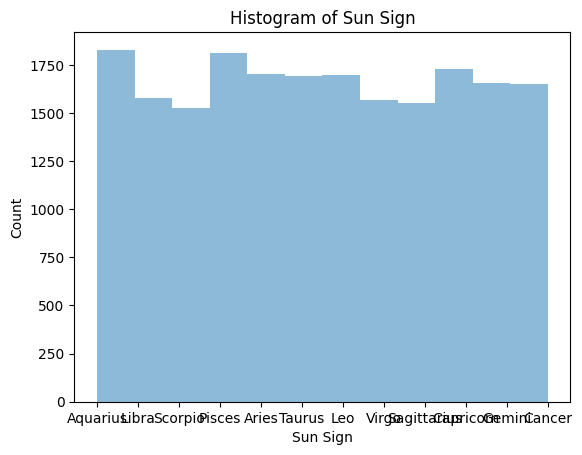

In [112]:
import matplotlib.pyplot as plt

plt.xlabel('Sun Sign')
plt.ylabel('Count')
plt.title('Histogram of Sun Sign')

# Create a histogram of sun sign data
plt.hist(df['sun_sign'], bins=12, alpha=0.5)

(8540, 95)


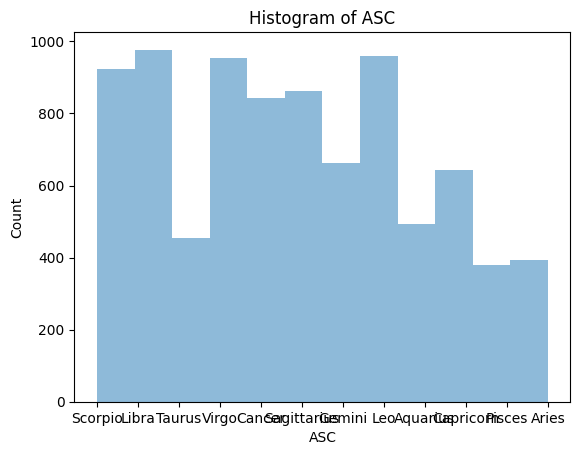

In [119]:
import matplotlib.pyplot as plt

plt.xlabel('ASC')
plt.ylabel('Count')
plt.title('Histogram of ASC')

df_asc = df.dropna(subset=['house_AC_sign'])
# Create a histogram of sun sign data
plt.hist(df_asc['house_AC_sign'], bins=12, alpha=0.5)
print(df_asc.shape)

In [97]:
count = df['birth_time'].isna().sum()
print('Number of NaN values in "birth time" column:', count)

Number of NaN values in "birth time" column: 11454


In [98]:
len(df)

19994

In [99]:
df["occupation"].unique()

array(['politician', 'writer', 'general', ..., 'gymnast',
       'writer, children of celebrity', 'writer, director, translator'],
      dtype=object)

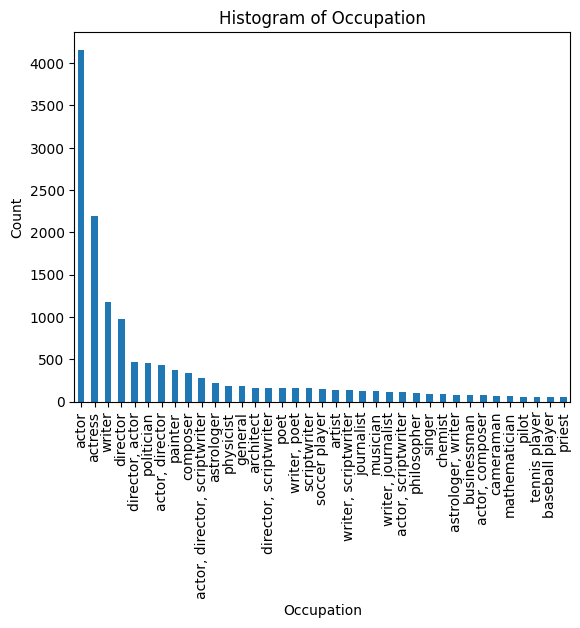

In [120]:
counts = df['occupation'].value_counts()

# Filter the results to exclude occupations with less than 10 counts
counts = counts[counts >= 50]

# Create a bar chart of the remaining occupations
counts.plot(kind='bar')

# Set axis labels and title
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Histogram of Occupation')

# Show the plot
plt.show()

In [101]:
df["death_cause"].unique()

array([None, 'Stroke', 'Suicide by Poisoning', 'Execution by Beheading',
       'Execution by Hanging', 'Murder', 'Disease', 'War Casualties',
       'Tuberculosis', 'Injury', 'Heart Attack',
       'Victims of Assassination', 'Pneumonia', 'Syphilis',
       'Execution by Gunshot', 'Cancer', 'Unclear cause',
       'Murder by Gunshot', 'Heart Failure', 'Suicide',
       'Suicide by Gunshot', 'Cirrhosis', 'Fever', 'Drowning',
       'Multiple Sclerosis', 'Accident', 'Suicide by Hanging',
       'Train Accident', 'Liver Failure', 'Kidney Failure',
       "Alzheimer's Disease", 'Respiratory/Lung Failure', 'Brain Failure',
       'Diabetes', 'Influenza', 'Aneurysm', 'Alcohol', 'Car Accident',
       'Asthma', 'Casualties of World War I', 'Leukemia', 'Execution',
       'Execution by Electric Chair', 'Aviation Accident',
       'Drug Overdose', 'Pill Overdose', "Parkinson's disease",
       'Stomach Failure', 'AIDS', 'Terrorism'], dtype=object)

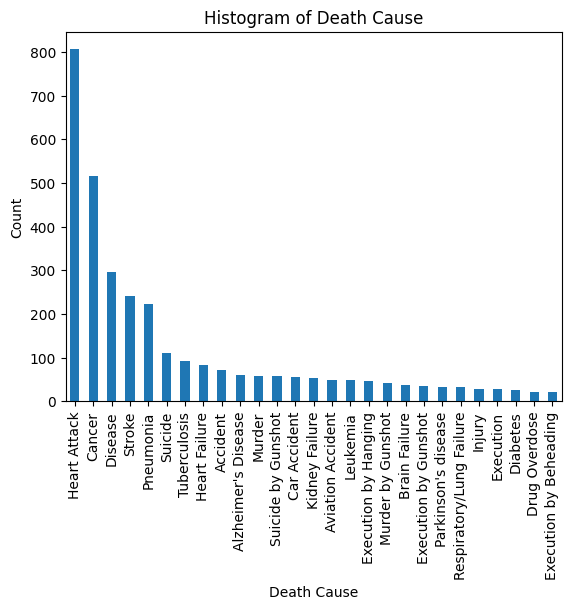

In [121]:
# Drop rows where 'death_cause' is NaN
df2 = df.dropna(subset=["death_cause"])

# Count the occurrences of each cause of death
counts = df2["death_cause"].value_counts()

counts = counts[counts >= 20]
# Create a bar chart of the causes of death
counts.plot(kind='bar')

# Set axis labels and title
plt.xlabel('Death Cause')
plt.ylabel('Count')
plt.title('Histogram of Death Cause')

# Show the plot
plt.show()

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

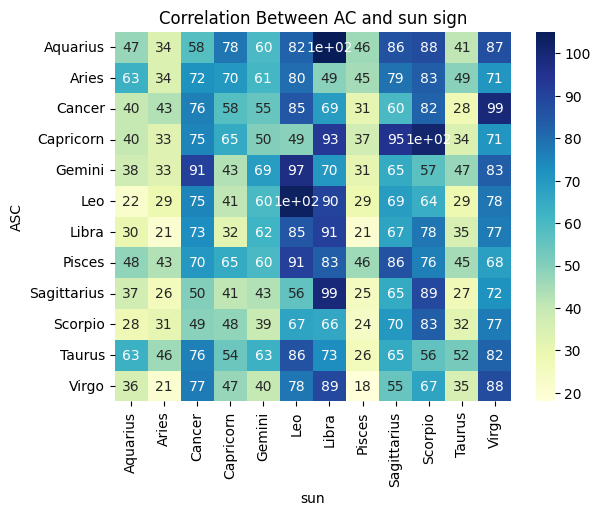

In [111]:
# Filter the DataFrame to include only occupations with more than 10 occurrences
counts = df['death_cause'].value_counts()
counts = counts[counts > 20]
df2 = df[df['death_cause'].isin(counts.index)]

# Create a contingency table of 'sun_sign' and 'occupation'
table = pd.crosstab(df['sun_sign'], df["house_AC_sign"])

# Create a heatmap of the correlation
sns.heatmap(table, annot=True, cmap='YlGnBu')

# Set axis labels and title
plt.xlabel('sun')
plt.ylabel("ASC")
plt.title('Correlation Between AC and sun sign')

# Show the plot
plt.show()

In [107]:
df2.shape

(3151, 95)